前章では、ニューラルネットワークの重みパラメータの損失関数の勾配を数値微分によって求めた。しかし、計算にとても時間がかかるという難点があることは言うまでもない。　　　　　　　　　　そこで今回は計算を効率良く行う手法である「誤差逆伝播法」について学んでいく。

# 計算グラフ

計算グラフとは、計算の過程をグラフによって表したものである。ここでは、簡単な問題から始めていき、最終的に誤差逆伝播法にたどり着くように練習してく。

計算グラフで解く

計算グラフはノードと矢印によって計算の過程を表す。　　　　　　　　　　　　　　　　　　　ノードは◯で表記し、◯の中に演算の内容を書く。また、計算の途中結果を矢印の上部に書くことでノードごとの計算結果が左から右に伝わるようにする。

問１　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　太郎くんはスーパーで一個100円のりんごを2個買いました。支払う金額を求めなさい。ただし消費税が10％適応されるものとする。　　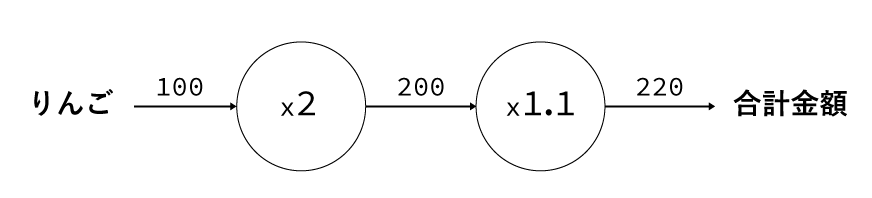　
画像については@edo_m18様のものをお借りしている　リンク元https://qiita.com/edo_m18/items/7c95593ed5844b5a0c3b

りんごの個数と消費税をそれぞれ変数として◯の外に表すこともできる。その場合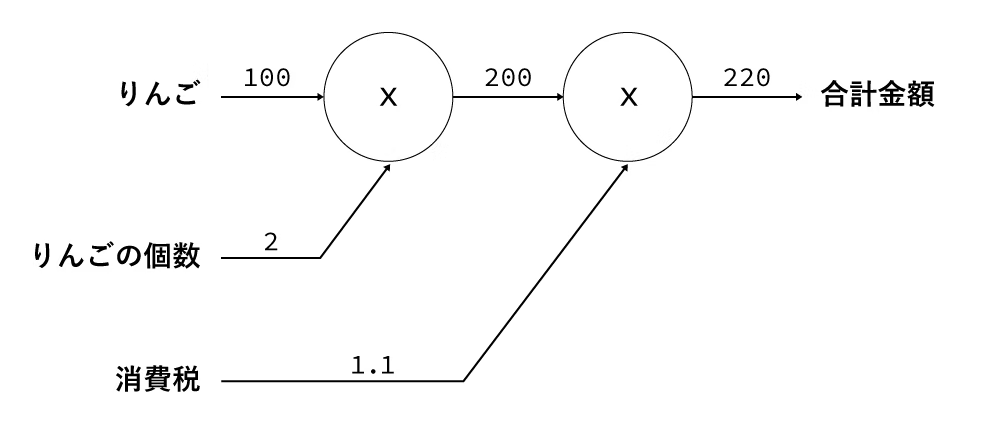

問２　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　太郎くんはスーパーでりんごを２個、蜜柑を３個買いました。りんごは一個１００円。蜜柑は１個１５０円です。消費税が１０％かかるものとして、支払金額を求めなさい。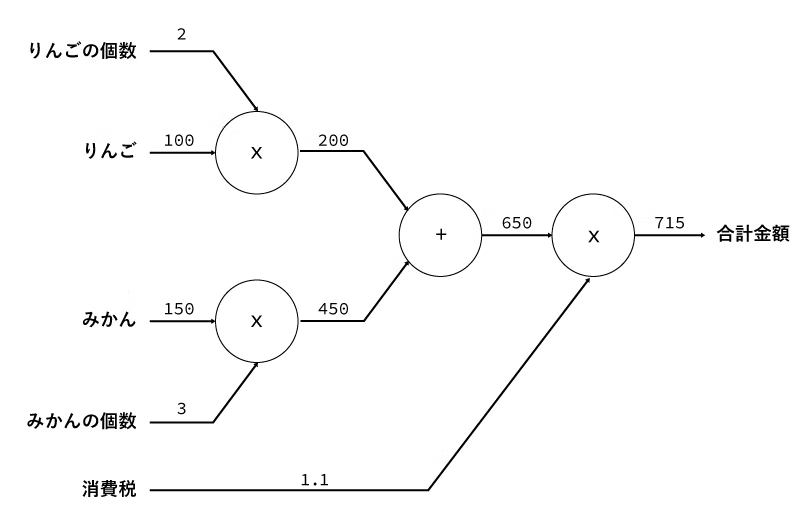　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　


この問題では加算ノードである「+」が加わっている。　　　　　　　　　　　　　　　　　　　　左から右に数式が伝達されている感覚を意識したい。

計算を左から右に進める、というステップを「順伝播」という。順伝播は計算グラフの出発点から終着点までの伝播で、それと逆に右から左方向への伝播を「逆伝播」という。　　　　　　　　　この逆伝播がこの先微分を計算するにあたって重要な働きをする。

# 局所的な計算

計算グラフの特徴であり利点は、「局所的な計算」を伝播することによって最終的な結果を得ることが出来るという点だ。つまるところ、全体の計算がいくら複雑であったとしても、各ステップで行うことは対象とするノードの「局地的な計算」なので、それぞれが役割を分担している、とも考えることが出来る。

たとえば先程の計算のりんごが値上がりした場合＝「りんごの値段に関する支払金額の微分」を求めるとき、計算グラフでの逆伝播を行うことで求めることが出来る。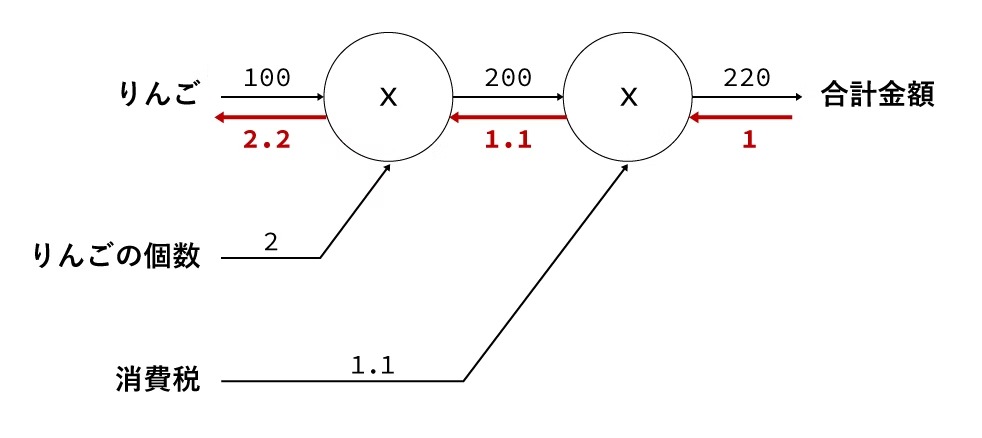

これはりんごの個数だけでなく「消費税に関する支払いの微分」や「りんごの個数に関する支払い金額の微分」も同様の手順で求めることができ、これを一般化すると下のように表せる。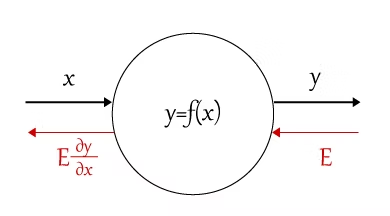

# 連鎖律

逆伝播では「局所的な微分」を逆方向に伝達していく。この原理は「連鎖律」によるもので、この連鎖率について理解し、計算グラフ上で逆伝播に対応するものであることを確認していく。

まず合成関数に関して説明する。合成関数とは複数の関数によって構成される関数のことで、たとえば、z=(x+y)^2という式は、２つの式で構成される。　　　　　　　　　　　　　　　　　　　　　z=t^2                                                                                      t=x+y                                           

連鎖率とは合成関数の微分についての性質であり、次のように定義される。（連鎖率の原理）

「ある関数が合成関数で表される場合、その合成関数の微分は、合成関数を構成するそれぞれの関数の微分の積によって表すことが出来る。」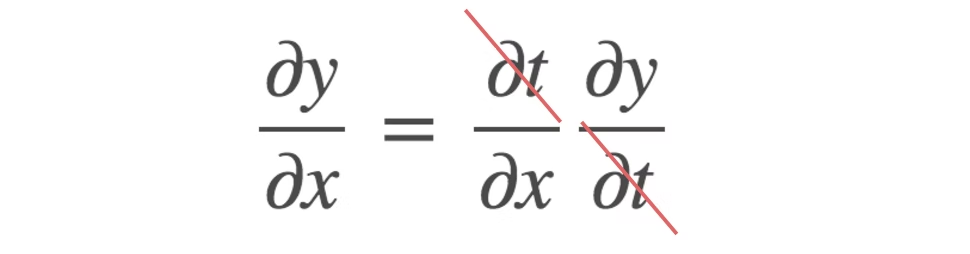

∂z/∂x=2t・1=2(x+y)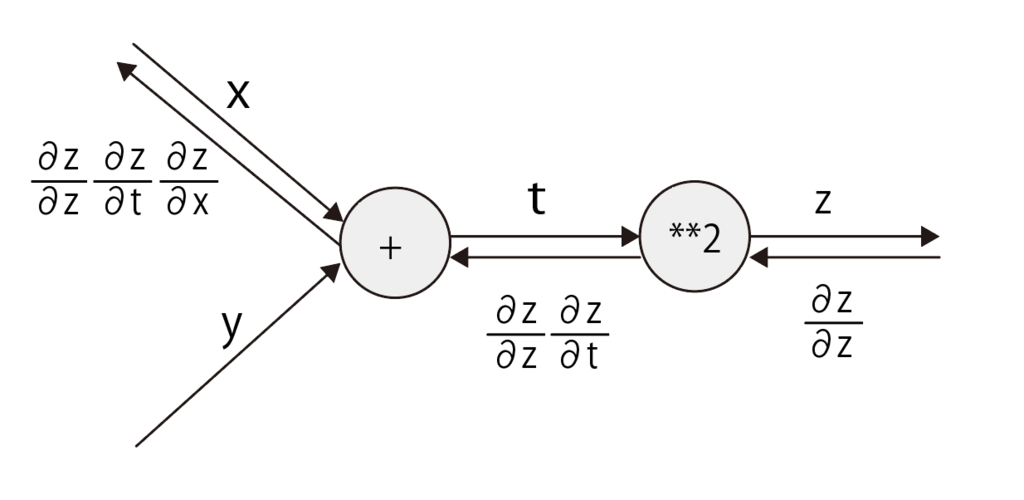計算の再利用が可能であることがわかる。このため計算が効率的になる。

# 逆伝播

加算ノードの逆伝播

z=x+yという数式の微分について次のように計算することが出来る。∂z/∂x=1 
∂z/∂y=1

これを計算グラフで表すと以下のようになる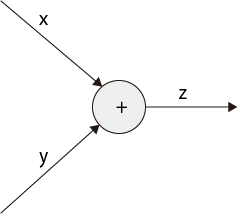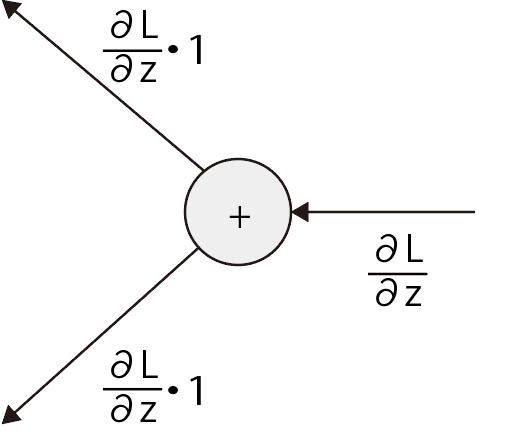

z=x+yという計算は、その大きな計算グラフの何処かに存在し、上流から∂L/∂xの値が伝わることになる。そして下流にはそれぞれ∂L/∂xと∂L/∂yの値を伝達していく。

乗算ノードの逆伝播

z=xyという式を考えると、この式の微分は∂z/∂x=y
∂z/∂y=xとなる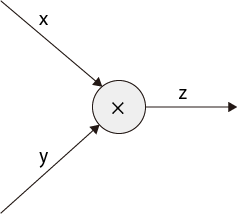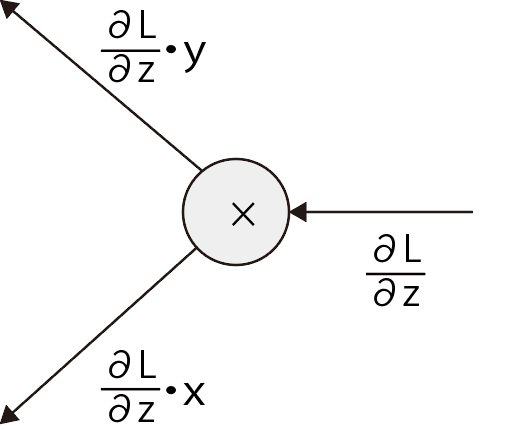

これらから、りんごの例での合計金額を表したグラフを逆伝播を使って解くと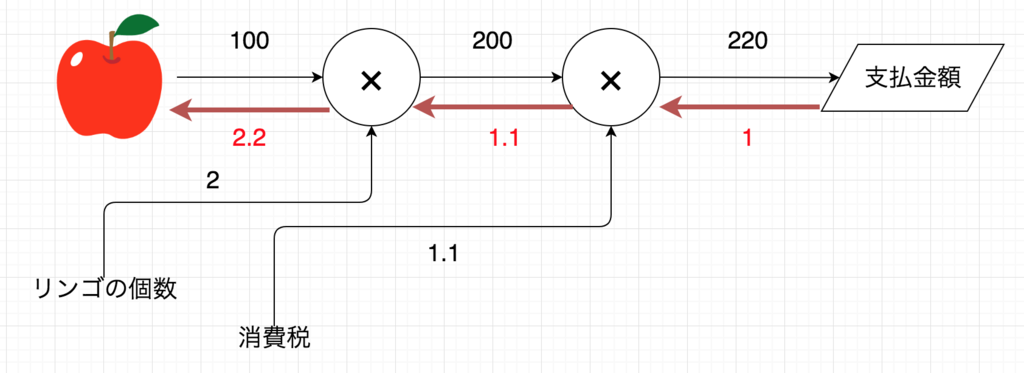

# レイヤの実装

乗算レイヤの実装

In [21]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

__init__()では、インスタンス変数であるxとyの初期化を行うが、これらは順伝播じの入力値を保持するために用いる。forward()では、X、Yの２つの引数を受け取り、それらを乗算して出力する。一方backward()では、上流から伝わってきた微分に対して、順伝播の”ひっくり返した値”を蒸散して下流に流す。

実際にりんごの買い物を実装してみる。

In [22]:
apple = 100
apple_num = 2
tax = 1.1

#layer
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(int(price))

220


In [23]:
# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, int(dapple_num), dtax)

2.2 110 200


加算レイヤの実装

続いて足し算ノードである加算レイヤを実装する。

In [24]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

次はりんご２個とみかん３個の買い物を実装してみる。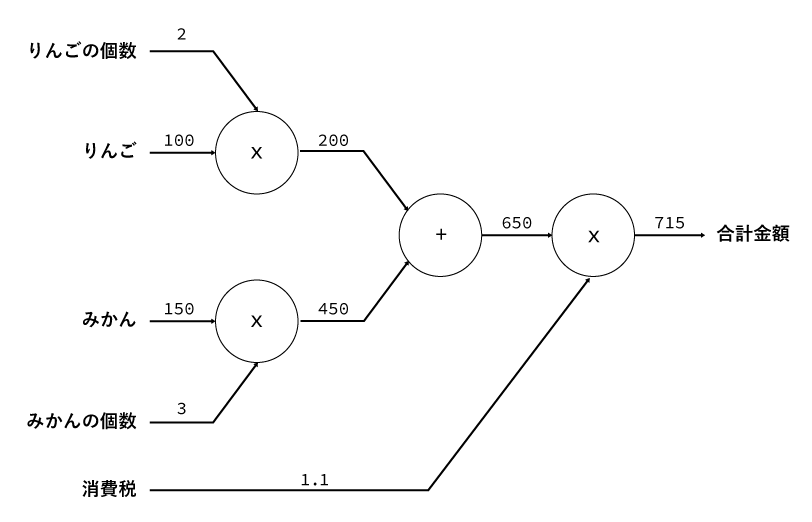

In [25]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print(int(price))
print(int(dapple_num), dapple, int(dorange), int(dorange_num), dtax)

715
110 2.2 3 165 650


# 活性化関数レイヤの実装

計算グラフの考え方をニュ＝ラルネットワークに適用してみる。ここでは、レイヤを一つのクラスとして実装する。まずは、活性化関数であるReLUとSigmoidレイヤを実装する

ReLU関数は次のような式で表せる

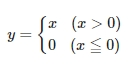

よってxに関するyの微分は次のように求められる。

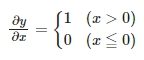

ReLU計算のグラフ　x>0のとき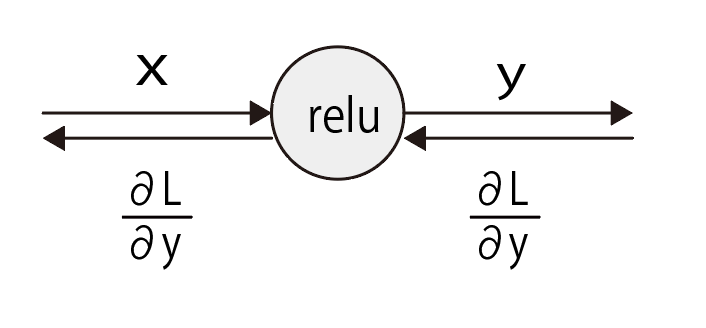

x<=0のとき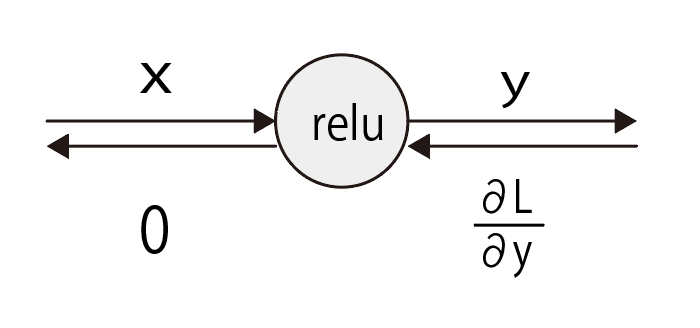

In [26]:
#実装
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

ReLUレイヤは回路におけるスイッチのような役割をする。順伝播時に電流が流れていればスイッチをONにし、電流が流れなければスイッチをOFFにする。逆伝播時にはスイッチがONであれば電流はそのまま流れ、OFFであればそれ以上電流は流れない。

sigmoidレイヤ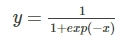

計算グラフで表すと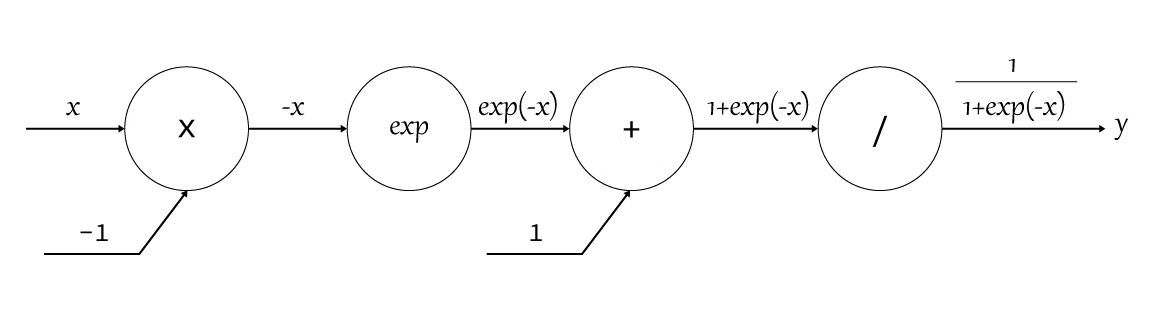

「exp」ノードではy=exp(x)の計算を行い、「/」ノードではy=1/xの計算をする。

このグラフの逆伝播を計算グラフに表すと次のようになる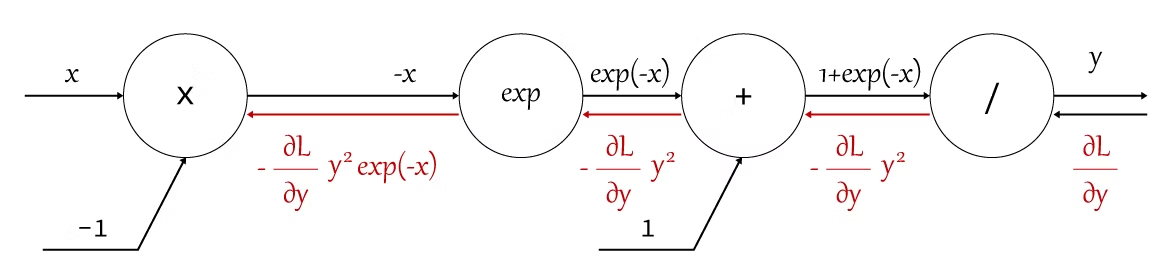

これで、複雑に見えるシグモイド関数の微分も、計算グラフを用いて「局所的な計算」の積で表せた。　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　実際に使う場合は、以下のようにシグモイドレイヤーとしてグループ化して計算をする。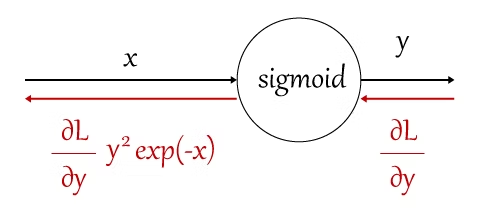

また、式をこのように変形できる。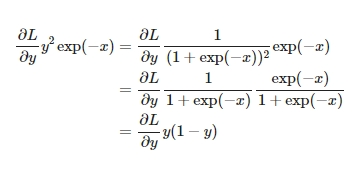
これらを使ってsigmoidレイヤを実装していくと次のようになる

In [27]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

# Affine/Softmaxレイヤの実装

ニューラルネットワークの順伝播では、重み付き記号の総和を計算するために、行列の積を用いた。幾何学の分野では行列の積の計算を「アフィン変換」と呼ぶ。アフィン変換を行う処理を「Affineレイヤ」として実装していく。

In [28]:
import numpy as np
X=np.random.rand(2) #入力
W=np.random.rand(2,3)#重み
B=np.random.rand(3)#バイアス

X.shape
W.shape
B.shape

Y=np.dot(X,W)+B

ここでは、X,W,Bはそれぞれ形状が(2,),(2,3,),(3,)の多次元配列であるとする。　　　　　　　　　すると、ニューロンの重み付き和はしたのY=の式で計算できる。

ここで行った計算の計算グラフの逆伝播について考えると、行列の要素ごとに書き下すことで、これまでのスカラ値を対象にした計算グラフと同じ手順で考えられる　　　　　　　　　　　　　　書き下してみると次のような式となる（導かれる過程https://qiita.com/jun40vn/items/de5ddeca4962edbd1bc2)
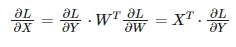

式のW^TのTは転置を表す。転置とはWの(i,j)の要素を(j,i)の要素に入れ替えることを言う。　　　　簡単に説明すると、Wの形状が(2,3)であるとき、W^Tの形状は(3,2)になる

それではこの式をもとに計算グラフの逆伝播を書いてみる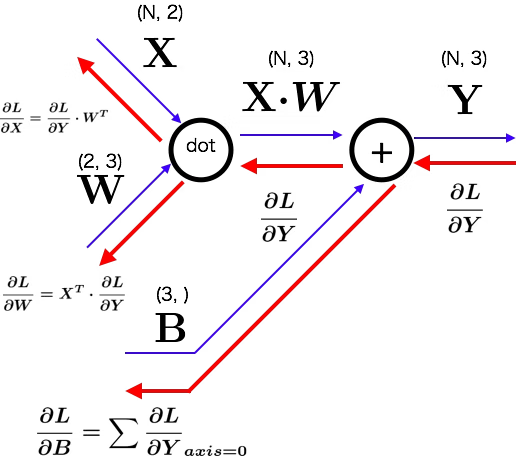

次に、バッチ（データのまとまり）版のAffineレイヤを考える。　　　　　　　　　　　　　　　　　
この際は、バイアスの加算に際して注意が必要である。コードに起こしてみる

In [29]:
# バッチ版Affineレイヤ
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.dot(dout, axis=0)

        return dx

Softmax-with-Lossレイヤ


出力層であるソフトマックス関数について説明する。振り返っておくと、ソフトマックス関数は入力された値を正規化して出力するものである。手書き数字認識で使用した。なお、手書き数字認識は１０クラスの分類を行うためSoftmaxレイヤへの入力は１０個あることになる　　　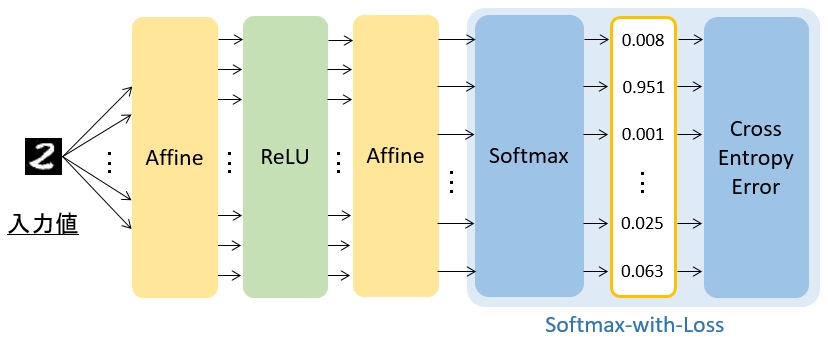　　　　　　　　

さらに損失関数である交差エントロピー誤差を含めて、「Softmax-with-Lossレイヤ」という名前で実装をする。その場合の計算グラフを示す。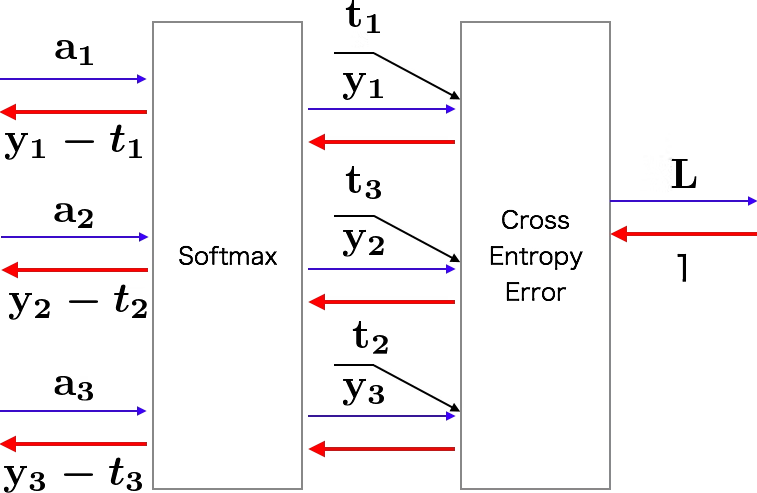

出力データyと教師データtの差をもとめるものとなっているが、興味深いのは逆伝播の結果が(y1=t1,y2-t2,y3-t3)という非常にキレイな形になっていることである。つまり、現在の誤差を素直に表しているものと定義できる。以下は実装

In [30]:
from common.functions import *

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

# 誤差逆伝播法の実装

前節で実装したレイヤを合わせることによって、ニューラルネットワークを構築することが出来る。まず、ニューラルネットワークの学習手順を再確認する

ステップ１、ミニバッチ　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　ステップ２、勾配の算出　各重みパラメータに関する損失関数の勾配を求める。　　　　　　　　　　
ステップ３、パラメータの更新　重みパラメータを勾配方向に微小量更新　　　　　　　　　　　　　　　　　　　　
ステップ４、繰り返す

TwoLayerNetとして実装する。

In [31]:
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads


OrderedDictは順番付きのディクショナリである。ディクショナリに追加した要素の順番を覚え、逆伝播ではその逆の順番をなぞっている。

誤差逆伝播法の勾配確認

数値部分の結果と誤差逆伝播法の結果を比較して、誤差逆伝播法の実装の正しさを確認することがよく行われる。’これを勾配確認と呼ぶ。

In [ ]:
import numpy as np
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

# 誤差逆伝播法を使った学習

それでは最後に誤差逆伝播法を使ったニューラルネットワークの学習を実装する。

In [ ]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    #誤差逆伝播法によって勾配を求める
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

まとめ

今回は、視覚的に計算の過程を表す計算グラフという手法を用いて、誤差逆伝播法を学んだ。　　　ReLUレイヤやSoftmax-with-Lossレイヤ、AffineレイヤやSoftmaxレイヤなどには、forwardとbackwardというメソッドが備えられており、これによってデータを順方向と逆に伝播することで、重みパラメータの勾配を非常に効率的に求めることができることがわかった。　　　　　　　　　　これらのレイヤをモジュール化することによって、ニューラルネットワークでは、自分の好きなネットワークを簡単に構成することが出来る。